# Movie Review Assessment

### Goal: Given a set of text movie reviews we have to predict whether it is positive or negative

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('moviereviews.csv')

In [4]:
df[df['label']=='pos'].iloc[0]['review']

'this has been an extraordinary year for australian films . \r\n " shine " has just scooped the pool at the australian film institute awards , picking up best film , best actor , best director etc . to that we can add the gritty " life " ( the anguish , courage and friendship of a group of male prisoners in the hiv-positive section of a jail ) and " love and other catastrophes " ( a low budget gem about straight and gay love on and near a university campus ) . \r\ni can\'t recall a year in which such a rich and varied celluloid library was unleashed from australia . \r\n " shine " was one bookend . \r\nstand by for the other one : " dead heart " . \r\n>from the opening credits the theme of division is established . \r\nthe cast credits have clear and distinct lines separating their first and last names . \r\nbryan | brown . \r\nin a desert settlement , hundreds of kilometres from the nearest town , there is an uneasy calm between the local aboriginals and the handful of white settlers 

In [5]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Checking  if there are any missing values in the dataframe.**

In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Removing any reviews that are NaN**

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

**Checking  to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string.**

In [9]:
df[df['review'].str.isspace()].count()

label     27
review    27
dtype: int64

In [10]:
k=df[df['review'].str.isspace()]
p=k.index
df.drop(p,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Confirming the value counts per label:**

In [12]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

### Training and Data

**Splitting the data into features and a label (X and y) and then preforming a train/test split.`**

In [13]:
X,y=df['review'],df['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training a Model

**Creating a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a linear svc  and then fitting that pipeline on the training data.**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [16]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Creating e a classification report and plotting a confusion matrix based on the results of the PipeLine.**

In [17]:
svc_pred=pipe.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [19]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



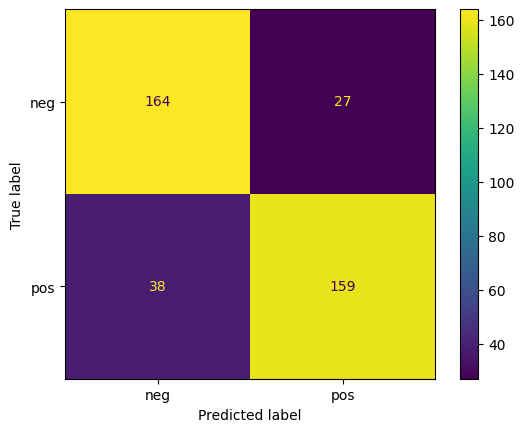

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test,svc_pred)

### Training the pipeline on the whole dataset

In [21]:
pipe.fit(X,y)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

### Checking the performance by giving some review by ourself

In [33]:
review1="The action scenes of this movie are great which makes it popular among the youths and it results in the higher rating of this movie"

In [34]:
print(pipe.predict([review1]))

['pos']


In [39]:
review2=" This is a very sarcastic movie"

In [40]:
print(pipe.predict([review2]))

['neg']
